In [ ]:
import os
import obspy
from obspy.core.stream import Stream
from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.clients.fdsn.header import URL_MAPPINGS
from pathlib import Path

import matplotlib
import math
import cartopy.crs as ccrs



# Looking at events downloaded from IRIS catalog

## Downloading events starting on JAN 1st

In [ ]:
client = Client("IRIS")

event_start = UTCDateTime("2019-01-01T00:00:00.005000Z")
event_end = event_start+8*24.0*60.0*60.0
cat = client.get_events(starttime=event_start,endtime=event_end,minmagnitude=3.0)



## Viewing gathered events on map

In [ ]:
ax = plt.axes(projection = ccrs.PlateCarree())
print(ccrs.PlateCarree())
ax.stock_img()
ax.set_xlim(left=-167,right=-123)
ax.set_ylim(bottom = 46, top = 73)
lat = []
lon = []
for e in cat:
    #print(e)
    #print(e["origins"])
    for o in e["origins"]:
        lat.append(o.latitude)
        lon.append(o.longitude)
        
        #print("lat: {} lon: {}".format(o.latitude,o.longitude))
plt.scatter(lon,lat,transform=ccrs.PlateCarree())
#plt.scatter([64.2],[-147.32],transform=ccrs.PlateCarree())
plt.scatter([-147.32],[64.2],transform=ccrs.PlateCarree())
plt.show()

In [ ]:
from obspy.clients.fdsn.header import URL_MAPPINGS
for key in sorted(URL_MAPPINGS.keys()):
    print("{0:<11} {1}".format(key,  URL_MAPPINGS[key]))

In [ ]:
cat_new = cat.filter("longitude >= -167","longitude <= -123")
ax = plt.axes(projection = ccrs.PlateCarree())
print(ccrs.PlateCarree())
ax.stock_img()
ax.set_xlim(left=-167,right=-123)
ax.set_ylim(bottom = 46, top = 73)
lat = []
lon = []
for e in cat_new:
    
    print(e)
    #print(e["origins"])
    for o in e["origins"]:
        lat.append(o.latitude)
        lon.append(o.longitude)
        
        #print("lat: {} lon: {}".format(o.latitude,o.longitude))
plt.scatter(lon,lat,transform=ccrs.PlateCarree())
#plt.scatter([64.2],[-147.32],transform=ccrs.PlateCarree())
plt.scatter([-147.32],[64.2],transform=ccrs.PlateCarree())
plt.show()

In [ ]:
path = Path("/scratch/naalexeev/LD")
start_time = UTCDateTime("2019-01-01T00:00:00.005000Z")
def get_stream(start_time,end_time,num_stations=10):
    i=0
    
    end_time = start_time+20.0*60.0*60.0
    print("start time: {} end time {},\n\tdelta:{}".format(start_time,end_time,end_time-start_time))
    arr = []
    for p in path.iterdir():
        j = 0
 
        for s in p.iterdir():
            st = obspy.read(str(s))
        
            for tr in st:
            
                if (tr.stats["starttime"]<=start_time and tr.stats["endtime"]>=end_time):
                    print("\t{} - {}".format(tr.stats["starttime"],tr.stats["endtime"]))
                    print("\t\tFITS!")
                    tr.resample(100.0)
                    tr.slice(start_time,end_time)
                    tr.stats['distance'] = float(len(arr))*100.0
                    arr.append(tr)
                
           
            
        
            if(j==20):
                break
            j+=1
        
        #print("\t{}".format(s))
        i+=1
    
        if(i==num_stations):
            break
    return Stream(traces = arr)


In [ ]:
has_event = get_stream(UTCDateTime(""))

In [ ]:
streams = []
for i in range(0,4):
    streams.append(get_stream(UTCDateTime("2019-01-01T00:00:00.005000Z")+float(i)*24*60.0*60.0))
    


In [ ]:
for sliced_stream in streams:
    if(len(sliced_stream)>0):
        #sliced_stream.plot(type='section')
        print(len(sliced_stream))
        x = 2
        y = float(len(sliced_stream))/float(x)
        y = int(math.ceil(y))
        print("x: {} y: {}".format(x,y))
        fig,axs = plt.subplots(x,y)
        trace_idx = 0
        
        for i in range(0,x):
            for j in range(0,y):
                sliced_stream[trace_idx].spectrogram(axes = axs[i,j])
                #axs[i,j].plot([i*j,i*j,i*j])
                trace_idx+=1
        plt.show()
        #for tr in sliced_stream:
                #tr.spectrogram()

In [ ]:
sliced_stream[0].spectrogram()

In [ ]:
sliced_stream[2].spectrogram()

In [ ]:
print("delta (h): {}".format((end_time-start_time)/(60.0*60.0)))

In [ ]:
slice_start = sliced_stream[0].stats["starttime"]
end_start = sliced_stream[0].stats["endtime"]


# Finding Event at Time 2019-01-01T03:03:30.604000Z

In [ ]:
event_time = UTCDateTime("2019-01-01T03:03:30.604000Z")
cat = get_stream(event_time-60.0,event_time+60.0,100)

In [ ]:
print(cat)

In [ ]:
cat.plot(type="section")
1+1;

In [ ]:
has_event = get_stream(UTCDateTime(""))

In [5]:
streams = []
for i in range(0,4):
    streams.append(get_stream(UTCDateTime("2019-01-01T00:00:00.005000Z")+float(i)*24*60.0*60.0))
    


start time: 2019-01-01T00:00:00.005000Z end time 2019-01-01T20:00:00.005000Z,
	delta:72000.0
	2019-01-01T00:00:00.005000Z - 2019-01-01T23:59:59.995000Z
		FITS!
	2019-01-01T00:00:00.005000Z - 2019-01-01T23:59:59.995000Z
		FITS!
	2019-01-01T00:00:00.000000Z - 2019-01-02T00:00:00.000000Z
		FITS!
	2019-01-01T00:00:00.005000Z - 2019-01-01T23:59:59.995000Z
		FITS!
	2019-01-01T00:00:00.005000Z - 2019-01-01T23:59:59.995000Z
		FITS!
	2019-01-01T00:00:00.000000Z - 2019-01-02T00:00:00.000000Z
		FITS!
start time: 2019-01-02T00:00:00.005000Z end time 2019-01-02T20:00:00.005000Z,
	delta:72000.0
	2019-01-02T00:00:00.005000Z - 2019-01-02T23:59:59.995000Z
		FITS!
	2019-01-02T00:00:00.005000Z - 2019-01-02T23:59:59.995000Z
		FITS!
	2019-01-02T00:00:00.000000Z - 2019-01-03T00:00:00.000000Z
		FITS!
	2019-01-02T00:00:00.005000Z - 2019-01-02T23:59:59.995000Z
		FITS!
	2019-01-02T00:00:00.005000Z - 2019-01-02T23:59:59.995000Z
		FITS!
	2019-01-02T00:00:00.000000Z - 2019-01-02T23:59:59.990000Z
		FITS!
start time

6
x: 2 y: 3


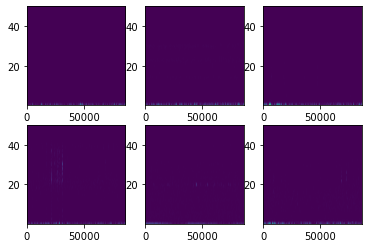

6
x: 2 y: 3


MemoryError: Unable to allocate 5.08 GiB for an array with shape (513, 664606) and data type complex128

MemoryError: Unable to allocate 2.54 GiB for an array with shape (512, 664606) and data type float64

<Figure size 432x288 with 6 Axes>

In [15]:
for sliced_stream in streams:
    if(len(sliced_stream)>0):
        #sliced_stream.plot(type='section')
        print(len(sliced_stream))
        x = 2
        y = float(len(sliced_stream))/float(x)
        y = int(math.ceil(y))
        print("x: {} y: {}".format(x,y))
        fig,axs = plt.subplots(x,y)
        trace_idx = 0
        
        for i in range(0,x):
            for j in range(0,y):
                sliced_stream[trace_idx].spectrogram(axes = axs[i,j])
                #axs[i,j].plot([i*j,i*j,i*j])
                trace_idx+=1
        plt.show()
        #for tr in sliced_stream:
                #tr.spectrogram()

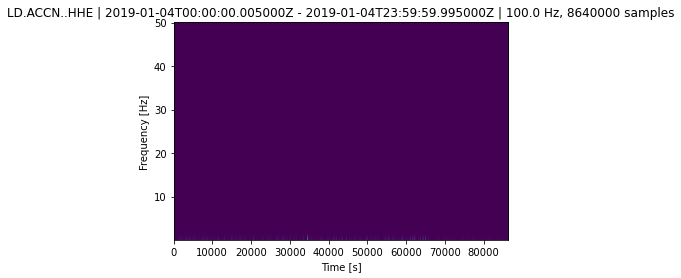

In [4]:
sliced_stream[0].spectrogram()

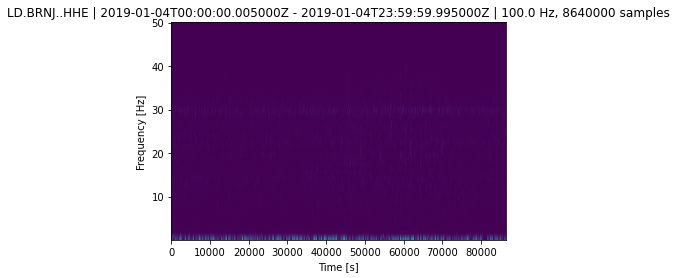

In [5]:
sliced_stream[2].spectrogram()

In [6]:
print("delta (h): {}".format((end_time-start_time)/(60.0*60.0)))

NameError: name 'end_time' is not defined

In [ ]:
slice_start = sliced_stream[0].stats["starttime"]
end_start = sliced_stream[0].stats["endtime"]


# Finding Event at Time 2019-01-01T03:03:30.604000Z

In [58]:
event_time = UTCDateTime("2019-01-01T03:03:30.604000Z")
cat = get_stream(event_time-60.0,event_time+60.0,100)

start time: 2019-01-01T03:02:30.604000Z end time 2019-01-01T23:02:30.604000Z,
	delta:72000.0
	2019-01-01T00:00:00.005000Z - 2019-01-01T23:59:59.995000Z
		FITS!
	2019-01-01T00:00:00.008400Z - 2019-01-02T00:00:00.024767Z
		FITS!
	2019-01-01T00:00:00.005000Z - 2019-01-01T23:59:59.995000Z
		FITS!
	2019-01-01T00:00:00.000000Z - 2019-01-02T00:00:00.000000Z
		FITS!
	2019-01-01T00:00:00.005000Z - 2019-01-01T23:59:59.995000Z
		FITS!
	2019-01-01T00:00:00.005000Z - 2019-01-01T23:59:59.995000Z
		FITS!
	2019-01-01T00:00:00.000000Z - 2019-01-02T00:00:00.000000Z
		FITS!
	2019-01-01T00:00:00.005000Z - 2019-01-01T23:59:59.995000Z
		FITS!
	2019-01-01T00:00:00.005000Z - 2019-01-01T23:59:59.995000Z
		FITS!
	2019-01-01T00:00:00.000000Z - 2019-01-02T00:00:00.000000Z
		FITS!
	2019-01-01T00:00:00.008400Z - 2019-01-01T23:59:59.998400Z
		FITS!
	2019-01-01T00:00:00.000000Z - 2019-01-02T00:00:00.000000Z
		FITS!
	2019-01-01T00:00:00.000000Z - 2019-01-02T00:00:00.000000Z
		FITS!
	2019-01-01T00:00:00.000000Z - 2019-

In [59]:
print(cat)

31 Trace(s) in Stream:

LD.ACCN..HHE | 2019-01-01T00:00:00.005000Z - 2019-01-01T23:59:59.995000Z | 100.0 Hz, 8640000 samples
...
(29 other traces)
...
LD.WVNY..HHE | 2019-01-01T00:00:00.005000Z - 2019-01-01T23:59:59.995000Z | 100.0 Hz, 8640000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


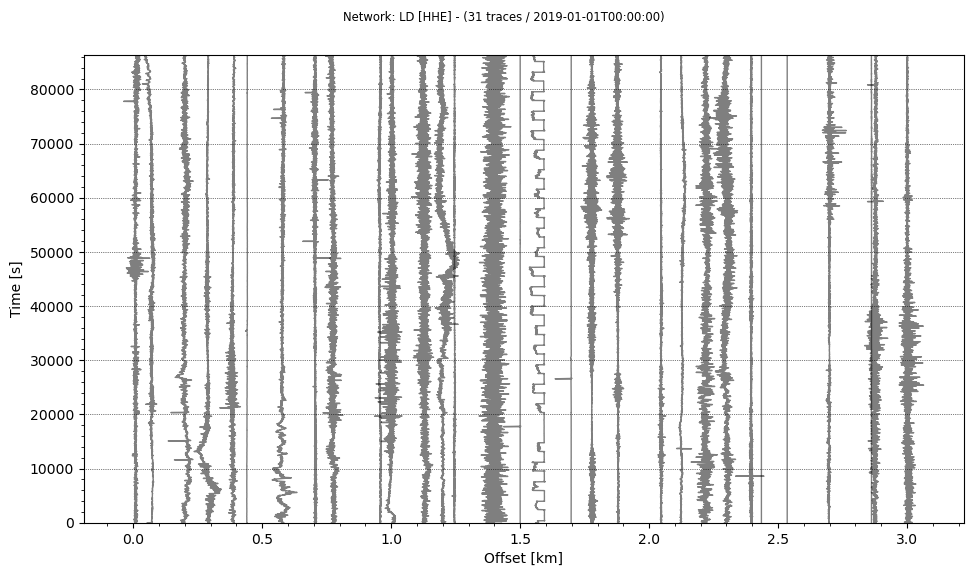

In [61]:
cat.plot(type="section")
1+1;